# Decision Tree

## Classification

In [1]:
# import iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris();
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
# get features and labels
# import iris dataset
X = iris.data[:, 2:]    # 'petal length (cm)', 'petal width (cm)'
y = iris.target
X, y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [3]:
# train decision tree using sklearn's DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2) # Scikit-Learn uses the CART algorithm
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [4]:
# Decision Tree Visualization
from sklearn.tree import export_graphviz

f = open("iris_tree.dot", 'w')
export_graphviz(
 tree_clf,
 out_file=f,
 feature_names=iris.feature_names[2:],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

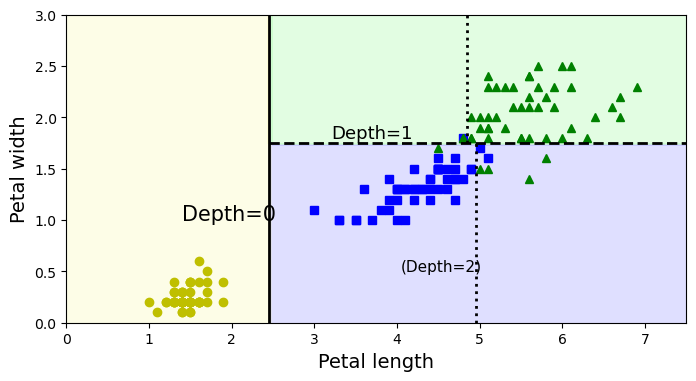

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [6]:
# predict
print(tree_clf.predict_proba([[5, 1.5]]))  # predict probability
print(tree_clf.predict([[5, 1.5]]))       # predict class

[[0.         0.90740741 0.09259259]]
[1]


## Regreesion

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

f = open("iris_tree_regression.dot", 'w')
export_graphviz(
 tree_clf,
 out_file=f,
 feature_names=iris.feature_names[2:],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )